## DAV 6150 Module 2 Assignment
-by Group Manling Yang, Xiaojia He, Qi Sun



***
## Introduction

The purpose of this study is to examine the properties of the wines that can predict the number of wine cases sold. The dataset we will be using is comprised of information on more than 12,700 wines, with many of the attributes being related to the chemical composition of the wines. Since there are more than one independent variable and all variables are numerical, it's better to conduct multiple linear regression to predict the number of wine cases sold. 

**Below is a short description of the variables in the data set:**

INDEX: Unique ID

TARGET: Response Variable (indicates # of cases of wine sold)

AcidIndex: Measures total acidity of wine via a weighted average

Alcohol: Alcohol Content

Chlorides: Chloride content of the wine

CitricAcid: Citric Acid content of the wine

Density: Density of the wine

FixedAcidity: FixedAcidity of the wine

FreeSulfurDioxide: Sulfur Dioxide content of the wine

LabelAppeal: Subjective marketing score that indicates the appeal of the design of the label on the bottle

ResidualSugar: Residual sugar content of the wine

STARS: Wine rating as determined by experts (4 = excellent; 1 = Poor)

Sulphates: Sulfate content of the wine

TotalSulfurDioxide: Total sulfur dioxide content of the wine

VolatileAcidity: Volatile acid content of the wine

pH: pH of the wine


**Variables:**

The following attributes can be used as **independent variables**:

> 1. AcidIndex
> 2. Alcohol
>3. Chlorides
4. CitricAcid
5. Density
6. FixedAcidity
7. FreeSulfurDioxide
8. LabelAppeal
9. ResidualSugar
10. STARS
11. Sulphates
12. TotalSulfurDioxide
13. VolatileAcidity
14. pH


**Dependent variable** is TARGET - the number of cases of wine sold. 


**Procedures:**

Here are main procedures of this project:

Step 1: Load data into the data frame from GitHub

Step 2: Exploratory Data Analysis

Step 3: Feature Engineering

Step 4: Re-run Exploratory Data Analysis and do comparisons

Step 5: Conclusion


>For **Step 2**, the main components of EDA include:
1. Data Description
2. Check the missing and null values
3. Check Duplicate Data
4. Create boxplot to detect Outliers
5. Check distribution
6. Analyze relationships between variables

>For **Step 3**, it consists of 5 stages:
1. Data Transformation
2. Handle the missing or null values of 'STARS'
3. Iterative Imputation for Missing Values of other variables
4. **Feature Selection - Pairplot & Domain knowledge research** 
5. New dataset after feature selection

>For **Step 4**, we re-run EDA to check the new dataset and compare it with the original one including:
1. Data description
2. Recheck distribution and outliers
3. Analyze relationships between independent variables and dependent variable
4. Analyze relationships between variables


***



In [1]:
# Importing required libraries.

import pandas as pd
import numpy as np

import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

import missingno as msno 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


/Users/yangyang/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


***
### Step 1: Load data into the data frame from GitHub

`.head()` returns the first 5 rows of the dataset. 

`.tail()` returns the last 5 rows of the dataset. 


In [2]:
# read datasource from Github
data = pd.read_csv("https://raw.githubusercontent.com/susanqisun/DAV-6150/master/assignments/M3/M3_Data.csv")

# To display the top 5 rows
data.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [3]:
# To display the bottom 5 rows
data.tail()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
12790,16120,0,5.0,-0.79,2.01,5.0,0.043,17.0,101.0,1.01077,3.39,0.57,4.9,1,5,NaN
12791,16123,5,8.9,0.47,0.29,84.9,0.259,54.0,NaN,0.99518,4.46,-1.20,NaN,-1,8,2.0
12792,16127,4,6.0,0.17,-1.10,37.0,0.078,25.0,108.0,0.99076,3.25,NaN,12.3,0,6,2.0
12793,16128,3,7.7,0.32,0.12,NaN,0.029,26.0,274.0,0.99060,3.97,0.62,11.0,-1,6,2.0
12794,16129,4,5.2,-0.04,-0.81,52.7,NaN,-106.0,242.0,0.99454,3.94,-0.12,9.9,0,7,2.0


***
### Step 2: Exploratory Data Analysis

In this case, the steps of Exploratory Data Analysis consist of:
>1. Data Description
2. Check the missing and null values
3. Check Duplicate Data
4. Create boxplot to detect Outliers
5. Create histogram distribution
6. Analyze relationships between variables


***
#### 1. Data description:
`.shape` returns the number of rows by the number of columns for the dataset. My output was (12795, 16), meaning the dataset has 12795 rows and 16 columns.

`.info()` returns information about a DataFrame including column names, data types, non-null values and memory usage.

`.nunique(axis=0)` returns the number of unique values for each variable.

`.describe()` summarizes the count, mean, standard deviation, min, and max for numeric variables. 

`.isnull().sum()` returns the columns and the number of missing values.


In [4]:
# size of the dataset:
data.shape

(12795, 16)

In [5]:
# display column names, datatype, and non-null values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INDEX               12795 non-null  int64  
 1   TARGET              12795 non-null  int64  
 2   FixedAcidity        12795 non-null  float64
 3   VolatileAcidity     12795 non-null  float64
 4   CitricAcid          12795 non-null  float64
 5   ResidualSugar       12179 non-null  float64
 6   Chlorides           12157 non-null  float64
 7   FreeSulfurDioxide   12148 non-null  float64
 8   TotalSulfurDioxide  12113 non-null  float64
 9   Density             12795 non-null  float64
 10  pH                  12400 non-null  float64
 11  Sulphates           11585 non-null  float64
 12  Alcohol             12142 non-null  float64
 13  LabelAppeal         12795 non-null  int64  
 14  AcidIndex           12795 non-null  int64  
 15  STARS               9436 non-null   float64
dtypes: f

In [6]:
# check the number of unique values per variable
data.nunique(axis=0)

INDEX                 12795
TARGET                    9
FixedAcidity            470
VolatileAcidity         815
CitricAcid              602
ResidualSugar          2077
Chlorides              1663
FreeSulfurDioxide       999
TotalSulfurDioxide     1370
Density                5933
pH                      497
Sulphates               630
Alcohol                 401
LabelAppeal               5
AcidIndex                14
STARS                     4
dtype: int64

In [7]:
# statistical summary of numeric variables:
data.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,1.000000,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


#### Findings:

>1. The dataset consists of 16 variables and 12,795 observations.
2. Missing values: some variables contain missing values, we'll discuss how to handle the missing values later.
3. The types of data are integer and float, so we don't need to make any change to the data type.
4. For the dependent variable - TARGET, there are 9 different values, including 0. That means some kinds of wines were not sold and the number of wines with the most sold is 8.
5. Some variables have negative values, which are meaningless. 
6. For the variable of "LabelAppeal", the negative design scores and 0 scores mean people don't like the design of the label on the bottle. 


#### 2. Check the missing and null values.

In [8]:
# percentage of colimns with missing values
miss = data.isnull().sum()/len(data)
# show the percentage of missing values for specific columns that contains missing values
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

pH                    0.030871
ResidualSugar         0.048144
Chlorides             0.049863
FreeSulfurDioxide     0.050567
Alcohol               0.051036
TotalSulfurDioxide    0.053302
Sulphates             0.094568
STARS                 0.262524
dtype: float64

####  Visualize the percents of nonmissing data

Text(0.5, 1.0, 'Figure 2-1. Percents of nonmissing data with missingno.')

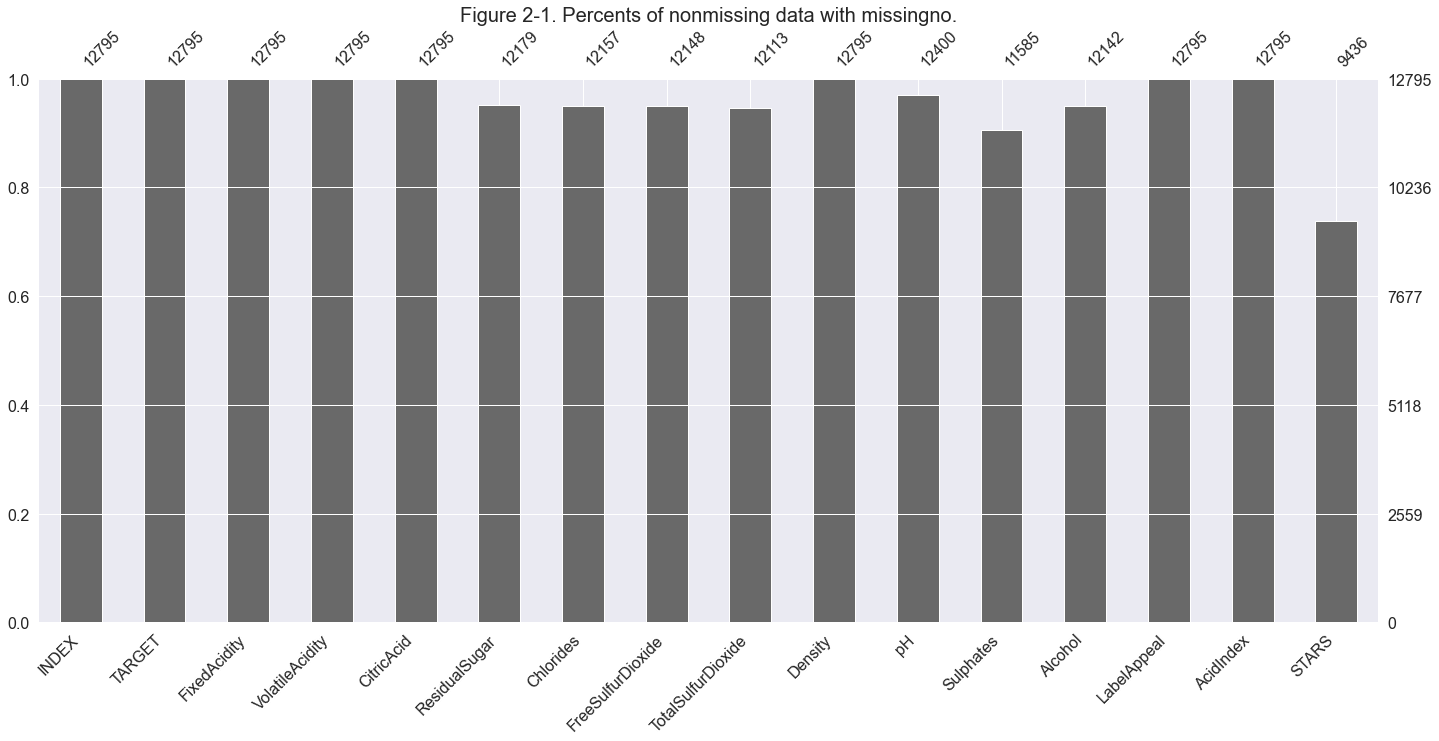

In [11]:
# create the bar charts to show percents of nonmissing databy missingo function
msno.bar(data)
plt.title('Figure 2-1. Percents of nonmissing data with missingno.',fontsize=20)

#### Findings:

>1. The independent variables of ResidualSugar, Chlorides, FreeSulfurDioxide, TotalSulfurDioxide, pH, Sulphates, and Alcohol have missing values.
2. The independent variables of "STARS" have missing values, which means over 25% of wines were not rated. 
3. The dependent variable "TARGET" has no missing value.


#### 3. Check Duplicate Data

In this case, we'll check if there are any duplicate Index numbers. After checking, we found there's no duplicate Index number in the dataset.


In [12]:
# find & select rows based on a single column
duplicateDFRow = data[data.duplicated(['INDEX'])]
print(duplicateDFRow)

Empty DataFrame
Columns: [INDEX, TARGET, FixedAcidity, VolatileAcidity, CitricAcid, ResidualSugar, Chlorides, FreeSulfurDioxide, TotalSulfurDioxide, Density, pH, Sulphates, Alcohol, LabelAppeal, AcidIndex, STARS]
Index: []


#### 4. Create boxplot to detect Outliers

We'll use `sns.boxplot` to discover outliers. If there is an outlier it will plot as a point in boxplot but other populations will be grouped together and display as boxes. Since the column of "INDEX" will not be used for the analysis, we'll delete it from the dataset.
 
Shown below is the box plots of all features.

In [13]:
# dropping irrelevant column
df = data.copy()
df.drop('INDEX', axis=1, inplace=True)

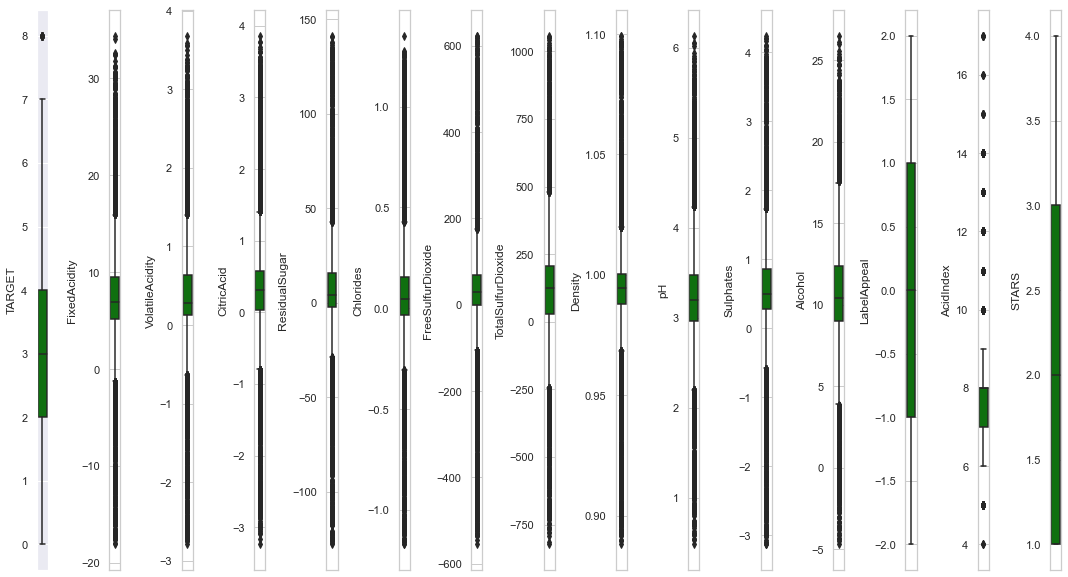

In [29]:
# show the boxplots of different variables in the same graph

l = df.columns.values
number_of_columns=15

number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,8*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()
    

#### Findings:
>1.  A large number of variables have numerous outliers. However, almost all of the variables are centered around zero.
2. TotalSulfurDioxide, FreeSulfurDioxide, and ResidualSugar variables have large ranges compared to other variables.
3. LabelAppeal and STARS have no outliers.


#### 5. Check Distribution

We'll check the distribution of the data — Whether the data is normally distributed or if it’s skewed (to the left or right).

First of all, we'll use `sns.FacetGrid` to check the distributio of 11 continuous variables that include Alcohol, Chlorides, CitricAcid, Density, FixedAcidity, FreeSulfurDioxide, ResidualSugar, Sulphates, TotalSulfurDioxide, VolatileAcidity, and pH. 

Then, we'll use `plt.hist` to check discrete variables -'STARS', 'LabelAppeal', 'AcidIndex', and 'TARGET'.

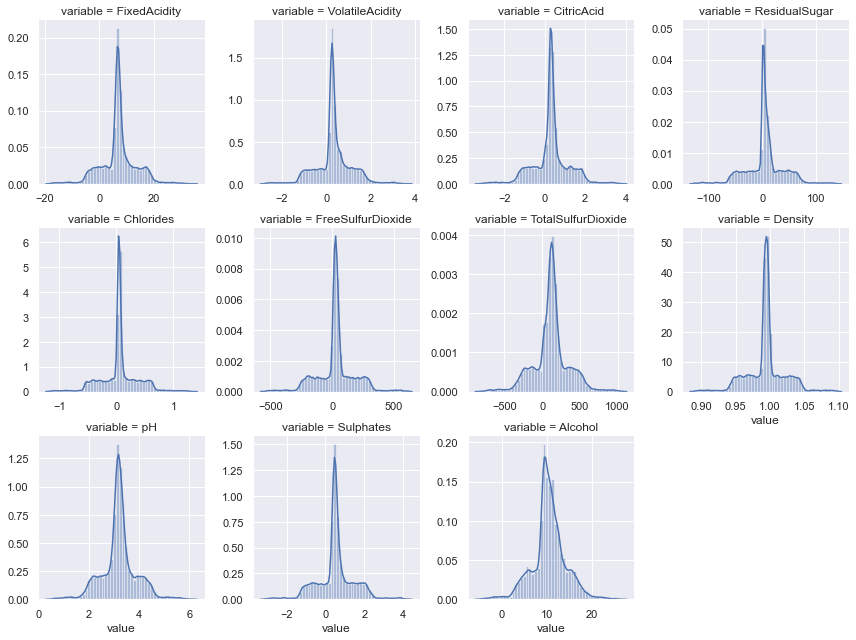

In [14]:
# use the FacetGrid to plot the histogram
df02 = df.drop(columns=['TARGET', 'STARS', 'LabelAppeal','AcidIndex'])
nd = pd.melt(df02)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

#### Findings:
>1. From the histograms above, most variables are normal distribution.
2. However, many variables have negative values and have different scales that seem implausible, like Alcohol.




#### 5.1 Check Distribution of 'STARS'

/Users/yangyang/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/yangyang/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Figure 5-1: Frequency of Wine Rating')

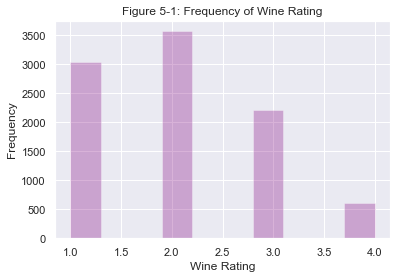

In [20]:
# histogram of 'STARS'
plt.hist(df['STARS'], bins = 10,facecolor='purple', alpha=0.3)
plt.xlabel('Wine Rating')
plt.ylabel('Frequency')
plt.title('Figure 5-1: Frequency of Wine Rating')


In [32]:
# percentage of each value
df.STARS.value_counts()/len(df)

2.0    0.279015
1.0    0.237749
3.0    0.172880
4.0    0.047831
Name: STARS, dtype: float64

In [33]:
# print the Percentage of wines without rating 
print('Percentage of wines without rating:', df['STARS'].isnull().sum()/len(df))

Percentage of wines without rating: 0.2625244236029699


#### Findings:
>1. Very few wines (4%) were rated as excellent (4 stars) by experts.
2. 2-star ratings are more common than 3-star ratings (27% vs. 17%)
3. 23.8% of wines were rated as poor by experts.
4. 26.3% of wines have a missing rating.
5. **How to handle the missing rating?** Remove rows with missing 'STARS' will result in data loss. 1-star and 2-star ratings are 50% of the total, which shows that these experts are fairly critical. A wine without STARS means that the experts didn't give any rating, so it's safe to replace the missing ratings with 0.


#### 5.2 Check Distribution of 'LabelAppeal'

Text(0.5, 1.0, 'Figure 5-2: Frequency of Design Score of Bottle Label')

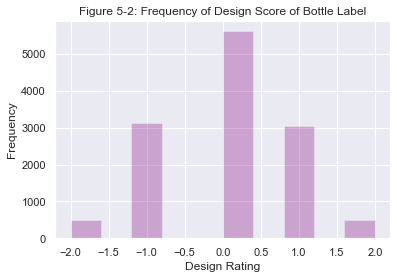

In [21]:
# histogram of 'LabelAppeal'
plt.hist(df['LabelAppeal'], bins = 10,facecolor='purple', alpha=0.3)
plt.xlabel('Design Rating')
plt.ylabel('Frequency')
plt.title('Figure 5-2: Frequency of Design Score of Bottle Label')

In [35]:
# percentage of each value
df.LabelAppeal.value_counts()/len(df)

 0    0.439000
-1    0.245096
 1    0.238218
-2    0.039390
 2    0.038296
Name: LabelAppeal, dtype: float64

In [36]:
# print the percentage of wine label without design score
print('Percentage of wine label without design score:', df['LabelAppeal'].isnull().sum()/len(df))

Percentage of wine label without design score: 0.0


#### Findings:
>1. There's no missing value in 'LabelAppeal'.
2. There are some negative values in 'LabelAppeal'.
3. **How to handle the negative values?** The negative scores in 'LabelAppeal' mean people strongly dislike the label design but it's difficult to distinguish the degree of dislike. Therefore, we'll replace -1 and -2 with -1 for 'LabelAppeal', which means strongly dislike.


#### 5.3 Check Distribution of 'AcidIndex'

Text(0.5, 1.0, 'Figure 5-3: Frequency of Acid Index')

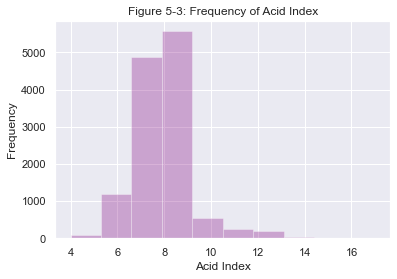

In [22]:
# histogram of 'AcidIndex'
plt.hist(df['AcidIndex'], bins = 10,facecolor='purple', alpha=0.3)
plt.xlabel('Acid Index')
plt.ylabel('Frequency')
plt.title('Figure 5-3: Frequency of Acid Index')

In [38]:
# percentage of each value
df.AcidIndex.value_counts()/len(df)

7     0.381243
8     0.323720
9     0.111528
6     0.093552
10    0.043064
11    0.020164
12    0.010004
5     0.005862
13    0.005393
14    0.003673
15    0.000625
17    0.000547
16    0.000391
4     0.000234
Name: AcidIndex, dtype: float64

In [39]:
# print the percentage of missing Acid Index
print('Percentage of missing Acid Index:', df['AcidIndex'].isnull().sum()/len(df))

Percentage of missing Acid Index: 0.0


#### Findings:
>1. There's no missing Acid Index.
2. We found that most wines have an acid index between 6 and 10. There are very few wines with an acid index of 4 or 15+.

#### 5.4 Check Distribution of 'TARGET'

Text(0.5, 1.0, 'Figure 5-4: Frequency of Wine Sold')

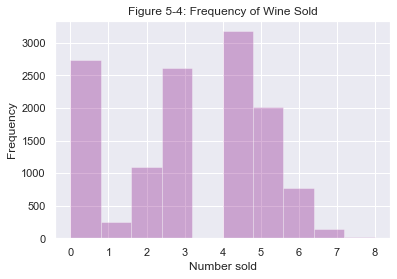

In [23]:
# histogram of 'TARGET' - dependent variable
plt.hist(df['TARGET'], bins = 10,facecolor='purple', alpha=0.3)
plt.xlabel('Number sold')
plt.ylabel('Frequency')
plt.title('Figure 5-4: Frequency of Wine Sold')

In [41]:
# percentage of each value
df.TARGET.value_counts()/len(df)

4    0.248300
0    0.213677
3    0.204064
5    0.157405
2    0.085268
6    0.059789
1    0.019070
7    0.011098
8    0.001329
Name: TARGET, dtype: float64

In [42]:
# print the percentage of wine sold with missing
print('Percentage of wine sold with missing:', df['TARGET'].isnull().sum()/len(df))

Percentage of wine sold with missing: 0.0


#### Findings:
>1. Over 20% of wines were not sold at all, not even a single case. 
2. 4 cases sold are the most common and few wines were sold only one case or 7+ cases.
3. These are no missing values in the dependent variables.

***
####  6. Analyze relationships between variables

Correlation is a measurement that describes the relationship between two variables.

Correlation matrix is a table that shows the Pearson correlation coefficients (Pearson's r) between many variables. We'll use `sns.heatmap()` to plot a correlation matrix of all of the variables in the dataset. Then, we'll use `.corr()` to double check the Pearson's r value.


Text(0.5, 1.0, 'Figure 6: Correlations')

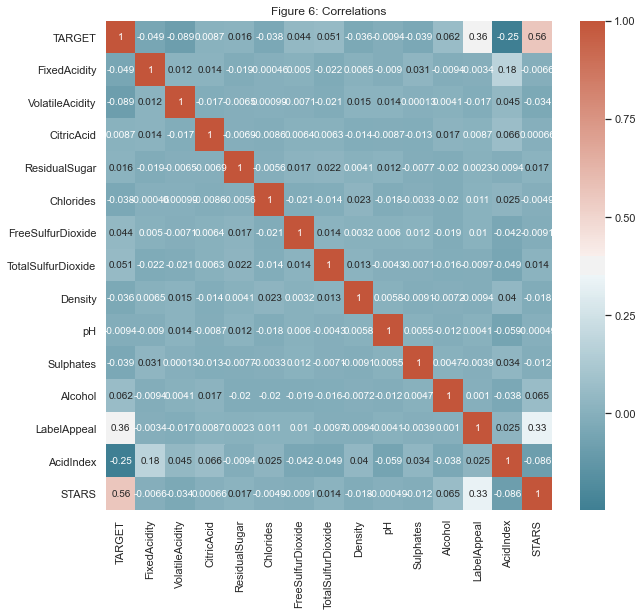

In [29]:
# Finding the correlation bewteen the Features.
plt.figure(figsize=(10,9))

corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Figure 6: Correlations')

In [44]:
# show the number of correlation for each attributes with TARGET
corr = df.corr()
print (corr['TARGET'].sort_values(ascending=False), '\n')

TARGET                1.000000
STARS                 0.558794
LabelAppeal           0.356500
Alcohol               0.062062
TotalSulfurDioxide    0.051478
FreeSulfurDioxide     0.043824
ResidualSugar         0.016491
CitricAcid            0.008685
pH                   -0.009445
Density              -0.035518
Chlorides            -0.038263
Sulphates            -0.038850
FixedAcidity         -0.049011
VolatileAcidity      -0.088793
AcidIndex            -0.246049
Name: TARGET, dtype: float64 



#### Findings:
>1. There's no multicollinearity between any two independent variables.
2. The independent variables with the highest 3 correlation coefficient r are STARS(r=0.559), LabelAppeal(r=0.357), and AcidIndex (r=-0.246). All other r values are between +0.1 and –0.1, which have very week correlations with TARGET. 

***
### Step 3. Feature Engineering

#### 1. Data transformation -  'LabelAppeal' - `.replace()`
LabelAppeal is the subjective marketing score that indicates the appeal of the design of the label on the bottle. 

In this case, there are some negative values (-1 and -2) in 'LabelAppeal', which means people strongly dislike the label design. The value 0 in 'LabelAppeal' means people don't like the label design. The value 1 means people like the label design. The value 2 means people strongly like the label design. 

We'll replace -1 and -2 with -1 for 'LabelAppeal', and keep 0, 1 and 2. 

In [30]:
# make a copy of data
df03=df.copy()

In [31]:
# replace -1 and -2 with 0
df03['LabelAppeal'] = df03[['LabelAppeal']].replace(to_replace = -1, value =-1) 
df03['LabelAppeal'] = df03[['LabelAppeal']].replace(to_replace = -2, value =-1) 

Text(0, 0.5, 'Frequency')

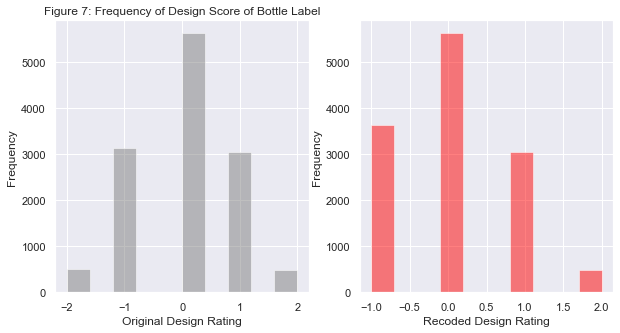

In [33]:
# distribution of 'LabelAppeal'
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.hist(df['LabelAppeal'], bins = 10,facecolor='grey', alpha=0.5)
plt.xlabel('Original Design Rating')
plt.ylabel('Frequency')
plt.title('Figure 7: Frequency of Design Score of Bottle Label')

plt.subplot(122)
plt.hist(df03['LabelAppeal'], bins = 10,facecolor='red', alpha=0.5)
plt.xlabel('Recoded Design Rating')
plt.ylabel('Frequency')


#### Findings:
>1. The histograms above compare the design rating before replacing and after replacing. 
2. As you can see, after replacing the negative values, it seems that most people dislike/strongly dislike the label designs. 

#### 2. Handle the missing and null values of 'STARS' - `fillna()`

STARS is the wine rating as determined by experts (4 = excellent; 1 = Poor). 

In this case, 26.3% of wines have missing values on STARS. Remove rows with missing 'STARS' will result in data loss. 1-star and 2-star ratings are 50% of the total, which shows that these experts are fairly critical. A wine without STARS means that the experts didn't give any rating, so it's reasonable to assume that wine without STARS means the experts give a rating 0. 



In [34]:
# replace null/missing values with 0
df03["STARS"].fillna(0, inplace = True) 

Text(0.5, 0, 'New STARS with no missing')

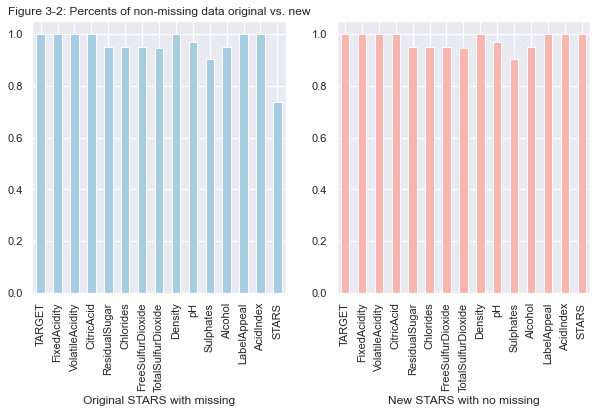

In [36]:
# Percents of nonmissing data with pandas.
plt.figure(figsize=(10,5))

plt.subplot(121)
(1 - df.isnull().mean()).abs().plot(kind='bar',colormap='Paired')
plt.xlabel('Original STARS with missing')
plt.title('Figure 3-2: Percents of non-missing data original vs. new')

plt.subplot(122)
(1 - df03.isnull().mean()).abs().plot(kind='bar',colormap='Pastel1')
plt.xlabel('New STARS with no missing')



***
#### 3. Iterative Imputation for Missing Values of other variables - `IterativeImputer()`


We also need to impute missing values from other numeric values. We'll use `IterativeImputer()`, which is a multivariate imputer that estimates each feature from all the others.
Also, the `IterativeImputer()` supports inductive mode. To use it we need to
add a special experimental import. 


In [37]:
# import IterativeImputer and enable_iterative_imputer from sklearn library
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# impute missing values
imp = IterativeImputer()
imp.fit(df03)
df04 = imp.transform(df03)
df04 = pd.DataFrame(df04, columns=df03.columns)

Text(0.5, 0, 'New dataset with no missing')

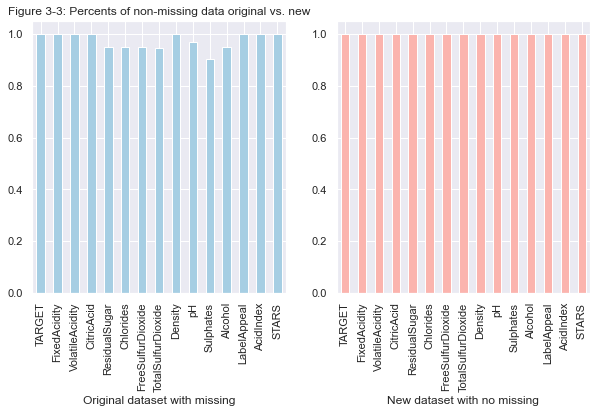

In [61]:
# Percents of nonmissing data with pandas.
plt.figure(figsize=(10,5))

plt.subplot(121)
(1 - df03.isnull().mean()).abs().plot(kind='bar',colormap='Paired')
plt.xlabel('Original dataset with missing')
plt.title('Figure 3-3: Percents of non-missing data original vs. new')

plt.subplot(122)
(1 - df04.isnull().mean()).abs().plot(kind='bar',colormap='Pastel1')
plt.xlabel('New dataset with no missing')


#### Results:
>  As you can see from the Figure 3-2 and Figure 3-3 (comparison plots) above, all missing values have been filled or imputed.


*** 
#### 4. Feature Selection

Before moving to the part of 'Transform negative values of the left independent variables and Remove outliers', we would like to do feature selection by using domain knowledge.

First of all, we'll use pairplot(kind="reg"), which will automatically fit a linear regression to the dataplot linear regression models.

Second, we'll select features by using the results of pairplots in the first round. Then, we'll do domain knowledge research on the selected features from the first round to see if we need to narrow down the feature selection. 

#### 4.1 Plots:
We devided all the features into three parts without any order: features01,features02,features03

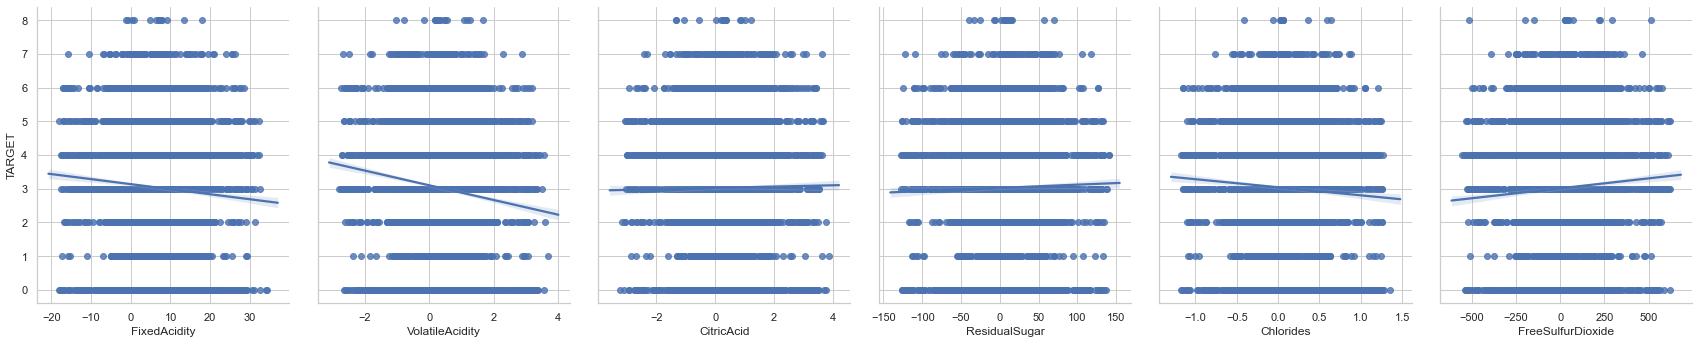

In [52]:
# plot the first 6 features

features01 = ["FixedAcidity", "VolatileAcidity", "CitricAcid", "ResidualSugar", "Chlorides",
            "FreeSulfurDioxide"]

sns.pairplot(df04, x_vars=features01, y_vars=["TARGET"],
             height=5, aspect=.8, kind="reg",palette='gist_heat');


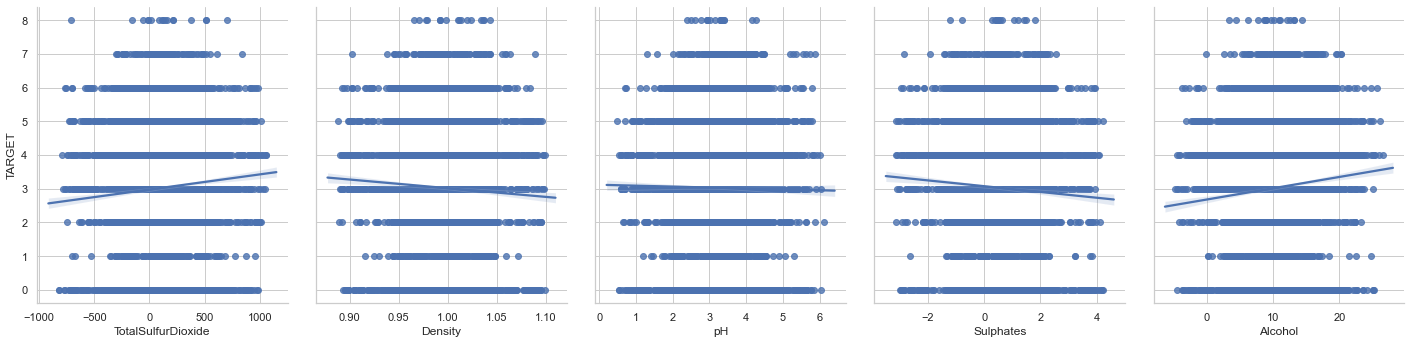

In [53]:
# plot the second 5 features

features02 = ["TotalSulfurDioxide", "Density", "pH", "Sulphates", "Alcohol"]

sns.pairplot(df04, x_vars=features02, y_vars=["TARGET"],
             height=5, aspect=.8, kind="reg");

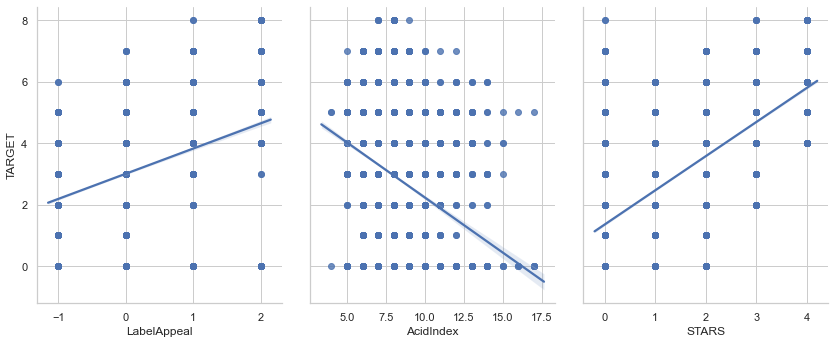

In [54]:
## plot the last 3 features

features03 = ["LabelAppeal", "AcidIndex", "STARS"]

sns.pairplot(df04, x_vars=features03, y_vars=["TARGET"],
             height=5, aspect=.8, kind="reg");

#### Findings:
>1. From the plots above, we found that STARS(r=0.559), LabelAppeal(r=0.357), and AcidIndex(r=-0.246) have the strongest linear relationship with TARGET. 
2. VolatileAcidity(r=-0.089), Alcohol(r=0.062), TotalSulfurDioxide(r=0.051), and FixedAcidity(r=-0.049) have weak linear relationship with TARGET. 
3. The relationships of all other features with TARGET are very weak(-0.048< r < 0.043), so we decide to ignore them.
4. We'll focus on the above 7 features and do domain knowledge research next for the regression models.
5. Positive correlations: between STARS and TARGET; between LabelAppeal and TARGET; between Alcohol and TARGET; between TotalSulfurDioxide and TARGET.
6. Negative correlations: between AcidIndex and TARGET; between VolatileAcidity and TARGET; between FixedAcidity and TARGET.


#### 4.2 Domain knowledge research:

Thanks to the author of the webpage https://rstudio-pubs-static.s3.amazonaws.com/405669_6aa3fec627404d949f1cd055c42e55bb.html. We'll use the results of domatin knowledge research from this webpage and the results of our own reseach.

>1. Volatile Acidity - In this case, the range of Volatile Acidity is from -2.79 to 3.68. The range US legal limit is at most 1.4 g/L (https://www.law.cornell.edu/cfr/text/27/4.21), or else the wine is considered “substandard”. Other countries probably have similar limits. 
We found that a lot of wines with values higher than this.
2. Alcohol is a percentage by volume. None of these values should be negative. The range of alcohol in this case is from -4.7 to 26.5. In fact, the number of wines with very low alcohol content (less than 4-5%) still seems quite high. Even a very low alcohol wine like a Moscato will still have at least 4-5% alcohol.
3. Total Sulfur Dioxide (TSO2) is the portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine such as aldehydes, pigments, or sugars. he TSO2 level is also regulated by the U.S. Alcohol and Tobacco Tax and Trade Bureau (TTB): The maximum allowable concentration for a bottled wine is 350 ppm (mg/L) of TSO2. The range of Total Sulfur Dioxide in this case is from -823 to 1057. 
4. Fixed Acidity - typical values of Fixed Acidity are:
1-4 g/L tartaric acid;
0-8 g/L malic acid;
0-0.5 g/L citric acid;
0.5-2 g/L succinic acid. We found that a lot of fixed acidity values in the 15+ range. Even assuming that fixed acidity is the sum of the four main fixed acids, this is way too high, even before considering the negative values.

#### Findings: 

> The data contains many implausible values for the independent variables representing chemical properties of wine, even separate from the issue of the negative values. We will focus our exploration and model building on the three variables that are not direct chemical properties of wine (STARS, LabelAppeal, and AcidIndex).



#### 5. Generate new dataset after feature selection

We'll create a new dataset with 3 independent variabels selected from the above analysis.

In [39]:
df_new = df04[['TARGET', 'STARS', 'LabelAppeal', 'AcidIndex']]
# check the first 5 rows
df_new.head()

,TARGET,STARS,LabelAppeal,AcidIndex
0,3.0,2.0,0.0,8.0
1,3.0,3.0,-1.0,7.0
2,5.0,3.0,-1.0,8.0
3,3.0,1.0,-1.0,6.0
4,4.0,2.0,0.0,9.0


***
### Step 3: Re-run EDA

This dataset consists of 12795 obsetvations and 4 columns. Three independent variables are STARS, LabelAppeal, and AcidIndex. The dependent variable is TARGET.

Only LabelAppeal has negative value, but that's what we need. We don't need to transform any negative values. Since there's no different scales in the new dataset, we don't need to do standardization. 


#### 1. Data description

We'll identify the data types, check the unique values, check missing values for each column, and identify the count for each variable. 

In [56]:
#Identify the Data Types
df06 = pd.DataFrame(df_new.dtypes,columns=['Dtype'])

#Identify the unique values
df06['Nunique'] = df_new.nunique()

#check missing values for each column
df06['MissingValues']=df_new.isnull().sum()

# Identify the count for each variable
df06['Count']=df_new.count()

df06

,Dtype,Nunique,MissingValues,Count
TARGET,float64,9,0,12795
STARS,float64,5,0,12795
LabelAppeal,float64,4,0,12795
AcidIndex,float64,14,0,12795


#### Findings:
>1. From the results above, we found that there are no missing values in this dataset. 
2. The total number of observations keeps the same as the original dataset, which is 12795. 
3. All attributes are numerical (float). 

#### 2. Recheck distribution and outliers

We'll use `sns.boxplot` to check distribution and outliers.

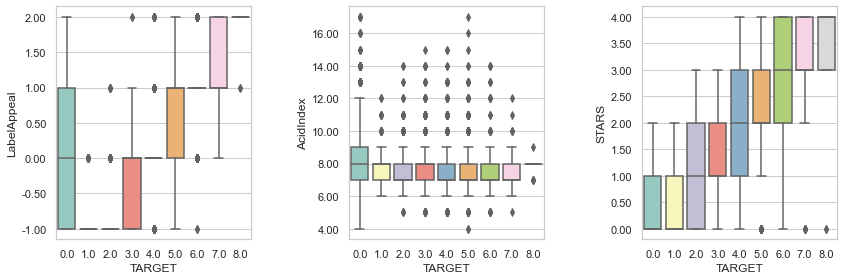

In [57]:
#import FormatStrFormatter from matplotlib library
from matplotlib.ticker import FormatStrFormatter

#BoxPlots for different features.
features = ["LabelAppeal", "AcidIndex", "STARS"]

fig = plt.figure(figsize=(14,30))
for i in range(len(features)):
    ax1 = fig.add_subplot(5, 3, i+1)
    ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    sns.boxplot(x='TARGET', y=features[i], data=df_new,palette="Set3")
    i = i + 1
plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.5)
plt.show()

#### Findings:

>1. From the boxplots above, there're some outliers in these 3 independent variables. However, these outliers are valid based on the domain knowledge research. We don't need to remove these outliers, and we'll keep them.
2. Also, based on our domain knowledge research, we don't need to rescale, standardize, and normalize data of these 3 independent variables for the regression models. 

#### 3. Analyze relationships between independent variables and dependent variable

We'll use `subplot` and `sns.barplot` to display the relationships between independent variables and dependent variable, and compare the mean 'TARGET' values by the levels of independent variables between the original dataset and the new dataset.

Text(0.5, 1.0, 'Figure 3-3-6: new AcidIndex vs. TARGET')

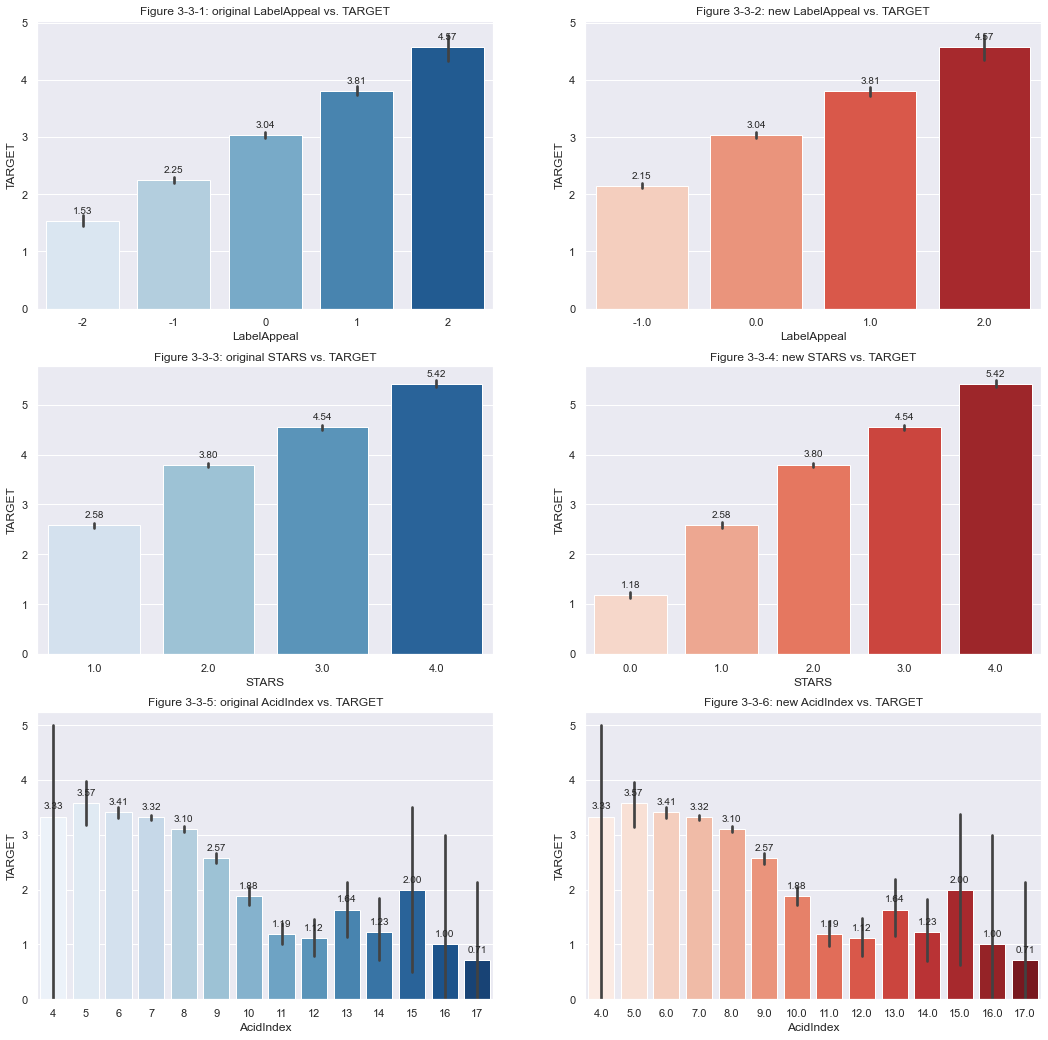

In [60]:
plt.figure(figsize=(18,18))

# plot of original LabelAppeal vs. TARGET
plt.subplot(321)
splot = sns.barplot(data=df, x = 'LabelAppeal', y = 'TARGET', palette = 'Blues')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Figure 3-3-1: original LabelAppeal vs. TARGET')

# plot of new LabelAppeal vs. TARGET
plt.subplot(322)
splot = sns.barplot(data=df_new, x = 'LabelAppeal', y = 'TARGET', palette = 'Reds')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Figure 3-3-2: new LabelAppeal vs. TARGET')
   
# plot of original STARS vs. TARGET
plt.subplot(323)
splot = sns.barplot(data=df, x = 'STARS', y = 'TARGET', palette = 'Blues')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Figure 3-3-3: original STARS vs. TARGET')

# plot of new STARS vs. TARGET
plt.subplot(324)
splot = sns.barplot(data=df_new, x = 'STARS', y = 'TARGET', palette = 'Reds')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Figure 3-3-4: new STARS vs. TARGET')

# plot of original AcidIndex vs. TARGET
plt.subplot(325)
splot = sns.barplot(data=df, x = 'AcidIndex', y = 'TARGET', palette = 'Blues')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Figure 3-3-5: original AcidIndex vs. TARGET')

# plot of new AcidIndex vs. TARGET
plt.subplot(326)
splot = sns.barplot(data=df_new, x = 'AcidIndex', y = 'TARGET', palette = 'Reds')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Figure 3-3-6: new AcidIndex vs. TARGET')


#### Findings:
>1. There's no change for the independent variable of AcidIndex since we did not make any changes (no missing in the original dataset). The Acid Index of top4 best selling wines are 5, 6, 4, and 7. 
2. For the label appeal score, we transformed -1 and -2 into -1 that means strongly dislike. However, this transformation did not change its relationship with the sales of wines. Higher label scores more sales of wines, which positively affected the sales of wines.
3. For the STARS, we filled the missing values with 0, which looks reasonable since there's no change on the relationship between STARS and the sales of wines. When the experts' rating increases, the sales of wines will increase.


#### 4. Analyze relationships between variables 

`sns.heatmap()` is used again to plot a correlation matrix of all of the variables in the new dataset. We'll compare new r values from the heatmap with the r values from the original dataset.

**New dataset:**

Text(0.5, 1.0, 'Figure: Correlations')

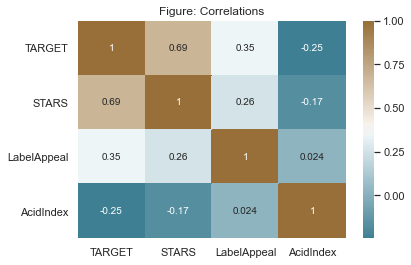

In [43]:
# Finding the correlation bewteen the Features.
corr02 = df_new.corr()# plot the heatmap
sns.heatmap(corr02, xticklabels=corr02.columns, yticklabels=corr02.columns, 
            annot=True, cmap=sns.diverging_palette(220,50, as_cmap=True))
plt.title('Figure: Correlations')


**Original dataset:**

In [44]:
# correlation coefficient r value from the original dataset
corr = df.corr()
print (corr['TARGET'].sort_values(ascending=False), '\n')


TARGET                1.000000
STARS                 0.558794
LabelAppeal           0.356500
Alcohol               0.062062
TotalSulfurDioxide    0.051478
FreeSulfurDioxide     0.043824
ResidualSugar         0.016491
CitricAcid            0.008685
pH                   -0.009445
Density              -0.035518
Chlorides            -0.038263
Sulphates            -0.038850
FixedAcidity         -0.049011
VolatileAcidity      -0.088793
AcidIndex            -0.246049
Name: TARGET, dtype: float64 



#### Findings:
>1. Comparing to our original dataset, only the correlation coefficient between TARGET and STARS has a change, from 0.56 to 0.69. 
2. The values of other two variables remain the same.

***
### Step 4: Conclusion

>**For EDA:**
1. We get the information that only STARS have the highest percentage of missing values(26%) and others are below 10%.
2. Most of the independent variables have many outliers, but some of them can be plausible so we did not delete them directly. And almost all of the variables are centered around zero.
3. Most of the variables are nearly normal distributions. However, many variables have negative values and have different scales that seem implausible.
4. There's no multicollinearity between any two independent variables. 

>**For Data preparation:**
1. Transferred the LabelAppeal value(-2,-1) to -1, which makes the data to be more understandable.
2. Used `IterativeImputer()` to impute the missing values and filled the missing values in STARS with 0, and we found there are no big differences on Pearson correlation coefficients (Pearson's r) before and after the imputing. Only the r value between TARGET and STARS has a big change, others remain the same.
3. We prefer to keep all observations for data integrity. After domian knowledge research, we finally selected 3 plausible independent variables (STARS, LabelAppeal, and AcidIndex) to predict TARGET. 


The Acid Index has a negative correlation with the sales of wines (r=-0.25). The higher the total acidity of wine the lower the wine sales. However, the label appeal score has a positive correlation with the sales of wines (r=0.35), which means higher label scores more sales of wines. The experts' rating has a positive correlation with the sales of wines (r=0.69). When the experts' rating increases, the sales of wines will increase. Next, we need to build multiple linear regression to see to what extent these 3 independent variables can predict the number of wine cases sold.

